In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
from opmap.RawCam import RawCam
from opmap.VmemMap import VmemMap
from opmap.PhaseMap import PhaseMap
from opmap.PhaseVarianceMap import PhaseVarianceMap
from opmap.util import makeMovie

# 1D cell test

In [36]:
folder_name = '20170624-1'
output_name = '20170624'

In [72]:
vmem = np.zeros([5400])

In [75]:
for i in range(5400):
    num = "{0:05d}".format(i+1)
    vmem[i] = np.load('/mnt/recordings/SimulationResults/%s/%s/v.npy' % (folder_name, num))

(5000, 5400)

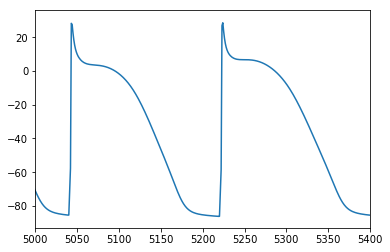

In [77]:
plt.plot(vmem)
plt.xlim([5000, 5400])

# 2D array test

In [78]:
folder_name = '20170624-2'
output_name = '20170624'

In [79]:
vmem = RawCam(path='/mnt/recordings/SimulationResults/%s/' % folder_name, cam_type='numpy', image_width=200, image_height=200, frame_start=0, frame_end=-1)

In [80]:
vmem_temp = VmemMap(vmem)

In [81]:
vmem.cmap = vmem_temp.cmap

In [82]:
vmem.saveImage('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/%s/%s' % (output_name, folder_name))

In [83]:
import subprocess

In [84]:
subprocess.call('ffmpeg -r 30 -y -i "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/%06d.png" -c:v libx264 -pix_fmt yuv420p -qscale 0 "/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/{0}/{1}/movie.mp4"'.format(output_name, folder_name), shell=True)

0

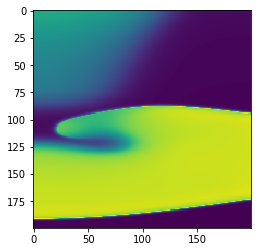

In [71]:
plt.imshow(vmem.data[97,:,:])